In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [8]:
airbnb=pd.read_csv('../input/madrid-airbnb-data/listings.csv')

In [9]:
airbnb.shape

(19618, 16)

In [10]:
airbnb.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [11]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19618 entries, 0 to 19617
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              19618 non-null  int64  
 1   name                            19615 non-null  object 
 2   host_id                         19618 non-null  int64  
 3   host_name                       19091 non-null  object 
 4   neighbourhood_group             19618 non-null  object 
 5   neighbourhood                   19618 non-null  object 
 6   latitude                        19618 non-null  float64
 7   longitude                       19618 non-null  float64
 8   room_type                       19618 non-null  object 
 9   price                           19618 non-null  int64  
 10  minimum_nights                  19618 non-null  int64  
 11  number_of_reviews               19618 non-null  int64  
 12  last_review                     

In [12]:
airbnb.duplicated().sum()
airbnb.drop_duplicates(inplace=True)
airbnb.isnull().sum()

id                                   0
name                                 3
host_id                              0
host_name                          527
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       5637
reviews_per_month                 5637
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [13]:
airbnb.drop(['name','id','host_name','last_review'], axis=1, inplace=True)
airbnb.head(5)

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,13660,Chamartín,Hispanoamérica,40.45724,-3.67688,Private room,60,1,78,0.58,1,180
1,83531,Latina,Cármenes,40.40381,-3.74130,Private room,31,4,33,0.42,2,364
2,82175,Arganzuela,Legazpi,40.38840,-3.69511,Entire home/apt,50,15,0,NaN,7,1
3,346366726,Centro,Universidad,40.42183,-3.70529,Entire home/apt,92,5,10,0.13,1,72
4,114340,Arganzuela,Legazpi,40.38975,-3.69018,Private room,26,2,149,1.12,1,365


In [14]:
airbnb.neighbourhood_group.value_counts(normalize=True)

Centro                   0.440871
Salamanca                0.067489
Chamberí                 0.063819
Arganzuela               0.056275
Tetuán                   0.041594
Carabanchel              0.036089
Retiro                   0.033846
Ciudad Lineal            0.033082
Puente de Vallecas       0.031451
Latina                   0.030992
Chamartín                0.029565
Moncloa - Aravaca        0.028239
San Blas - Canillejas    0.025334
Hortaleza                0.018554
Fuencarral - El Pardo    0.016057
Usera                    0.014273
Villaverde               0.009022
Barajas                  0.008767
Moratalaz                0.006015
Villa de Vallecas        0.004995
Vicálvaro                0.003670
Name: neighbourhood_group, dtype: float64

In [15]:
airbnb.fillna({'reviews_per_month':0}, inplace=True)
#examing changes
airbnb.reviews_per_month.isnull().sum()

0

In [16]:
airbnb.isnull().sum()
airbnb.dropna(how='any',inplace=True)
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19618 entries, 0 to 19617
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         19618 non-null  int64  
 1   neighbourhood_group             19618 non-null  object 
 2   neighbourhood                   19618 non-null  object 
 3   latitude                        19618 non-null  float64
 4   longitude                       19618 non-null  float64
 5   room_type                       19618 non-null  object 
 6   price                           19618 non-null  int64  
 7   minimum_nights                  19618 non-null  int64  
 8   number_of_reviews               19618 non-null  int64  
 9   reviews_per_month               19618 non-null  float64
 10  calculated_host_listings_count  19618 non-null  int64  
 11  availability_365                19618 non-null  int64  
dtypes: float64(3), int64(6), object(

In [17]:
airbnb.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,1.961800e+04,19618.000000,19618.000000,19618.000000,19618.000000,19618.000000,19618.000000,19618.000000,19618.000000
mean,1.312165e+08,40.420984,-3.694040,129.271740,6.586196,31.858803,0.802427,10.229177,159.098328
std,1.166790e+08,0.022627,0.028671,484.143545,33.286582,63.938997,1.247008,23.546472,144.252803
min,7.952000e+03,40.332210,-3.863910,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,2.765313e+07,40.409393,-3.707700,35.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,9.901898e+07,40.419735,-3.701120,58.000000,2.000000,4.000000,0.220000,2.000000,126.000000
75%,2.256898e+08,40.430290,-3.685420,100.000000,3.000000,31.000000,1.070000,6.000000,320.000000
max,3.964281e+08,40.562740,-3.531900,9999.000000,1125.000000,706.000000,16.220000,163.000000,365.000000


In [18]:
airbnb.columns

Index(['host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

Index(['host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

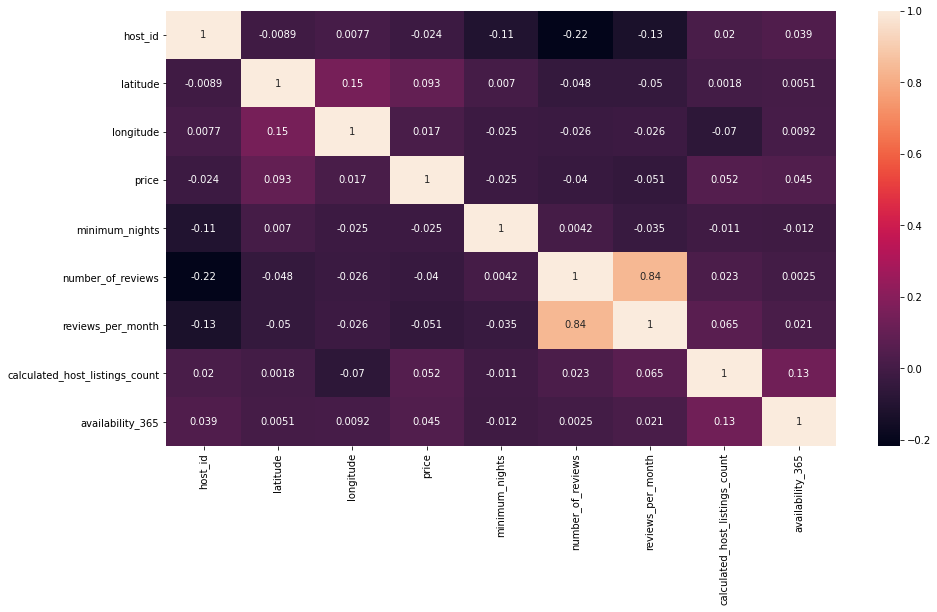

In [20]:
corr = airbnb.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
airbnb.columns

Index(['host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

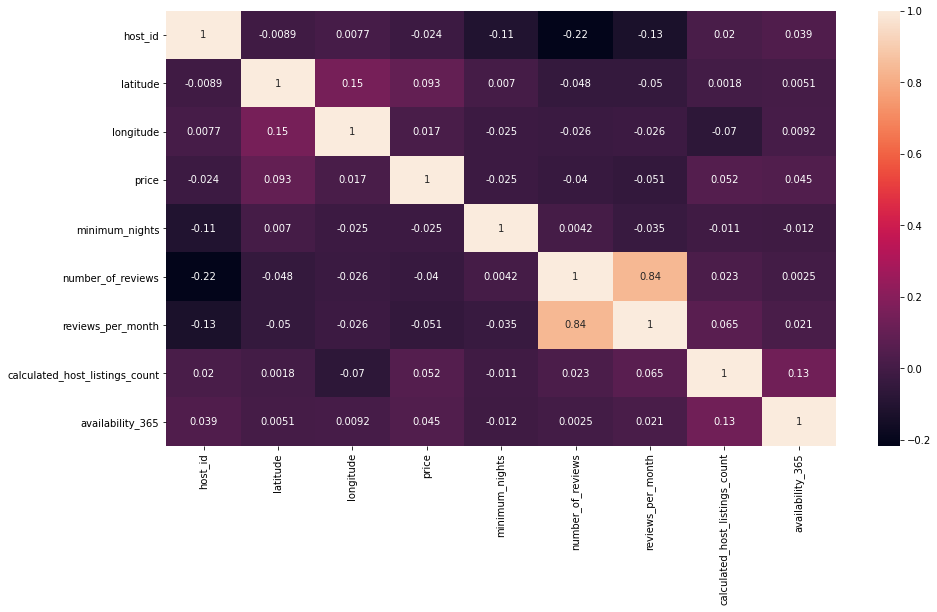

In [21]:
corr = airbnb.corr(method="kendall")
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
airbnb.columns

In [22]:
airbnb.shape

(19618, 12)

In [23]:
airbnb.head(15)

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,13660,Chamartín,Hispanoamérica,40.45724,-3.67688,Private room,60,1,78,0.58,1,180
1,83531,Latina,Cármenes,40.40381,-3.74130,Private room,31,4,33,0.42,2,364
2,82175,Arganzuela,Legazpi,40.38840,-3.69511,Entire home/apt,50,15,0,0.00,7,1
3,346366726,Centro,Universidad,40.42183,-3.70529,Entire home/apt,92,5,10,0.13,1,72
4,114340,Arganzuela,Legazpi,40.38975,-3.69018,Private room,26,2,149,1.12,1,365
5,82175,Arganzuela,Legazpi,40.38860,-3.69492,Entire home/apt,85,1,3,0.03,7,365
6,130907,Centro,Sol,40.41476,-3.70418,Entire home/apt,65,5,170,1.29,3,351
7,132883,Centro,Embajadores,40.41259,-3.70105,Entire home/apt,54,3,8,0.11,1,0
8,162701,Centro,Palacio,40.41844,-3.71073,Entire home/apt,1400,3,0,0.00,3,365
9,34217435,Centro,Justicia,40.41969,-3.69736,Entire home/apt,79,3,118,0.91,11,302


In [24]:
import seaborn as sns

In [25]:
airbnb['neighbourhood_group'].unique()

array(['Chamartín', 'Latina', 'Arganzuela', 'Centro', 'Salamanca',
       'Fuencarral - El Pardo', 'Puente de Vallecas', 'Ciudad Lineal',
       'Chamberí', 'Villaverde', 'Hortaleza', 'Moncloa - Aravaca',
       'Carabanchel', 'Tetuán', 'Retiro', 'San Blas - Canillejas',
       'Villa de Vallecas', 'Barajas', 'Usera', 'Moratalaz', 'Vicálvaro'],
      dtype=object)

Text(0.5, 1.0, 'Neighbourhood Group')

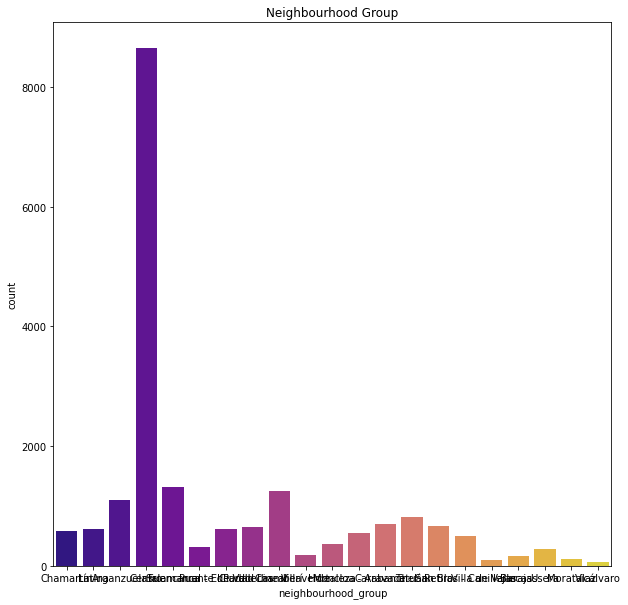

In [26]:
sns.countplot(airbnb['neighbourhood_group'], palette="plasma")
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Neighbourhood Group')

Text(0.5, 1.0, 'Neighbourhood')

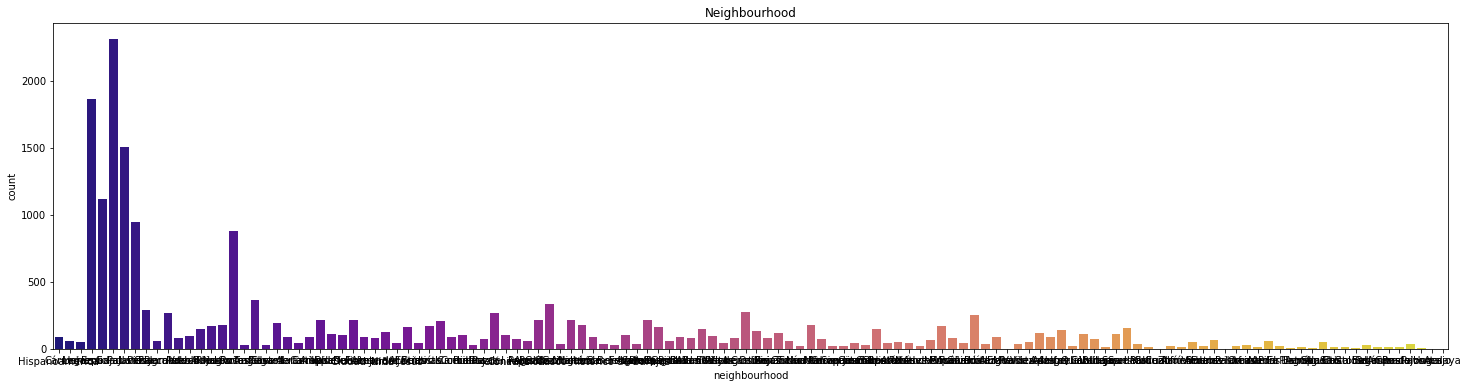

In [27]:
sns.countplot(airbnb['neighbourhood'], palette="plasma")
fig = plt.gcf()
fig.set_size_inches(25,6)
plt.title('Neighbourhood')

Text(0.5, 1.0, 'Restaurants delivering online or Not')

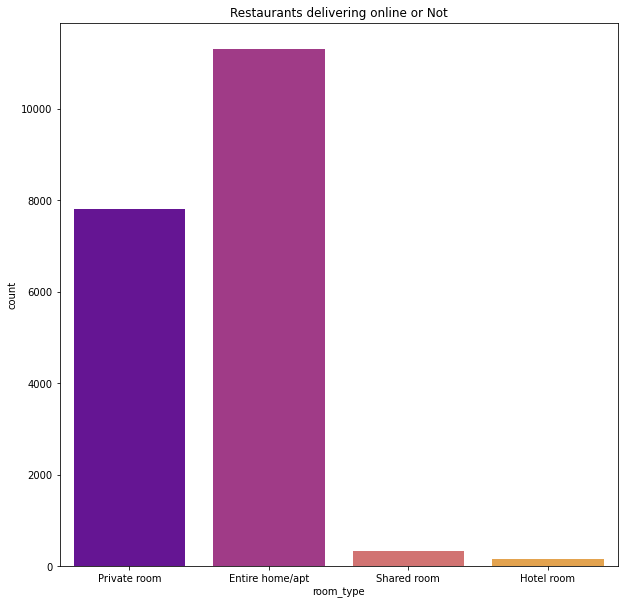

In [28]:
sns.countplot(airbnb['room_type'], palette="plasma")
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Restaurants delivering online or Not')

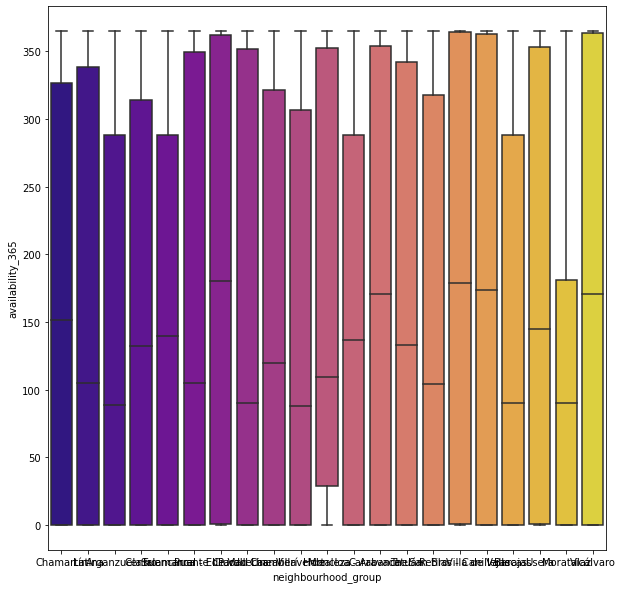

In [29]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(data=airbnb, x='neighbourhood_group',y='availability_365',palette='plasma')

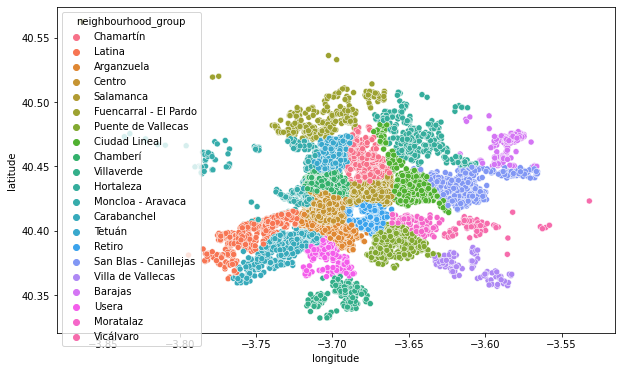

In [30]:
plt.figure(figsize=(10,6))
sns.scatterplot(airbnb.longitude,airbnb.latitude,hue=airbnb.neighbourhood_group)
plt.ioff()

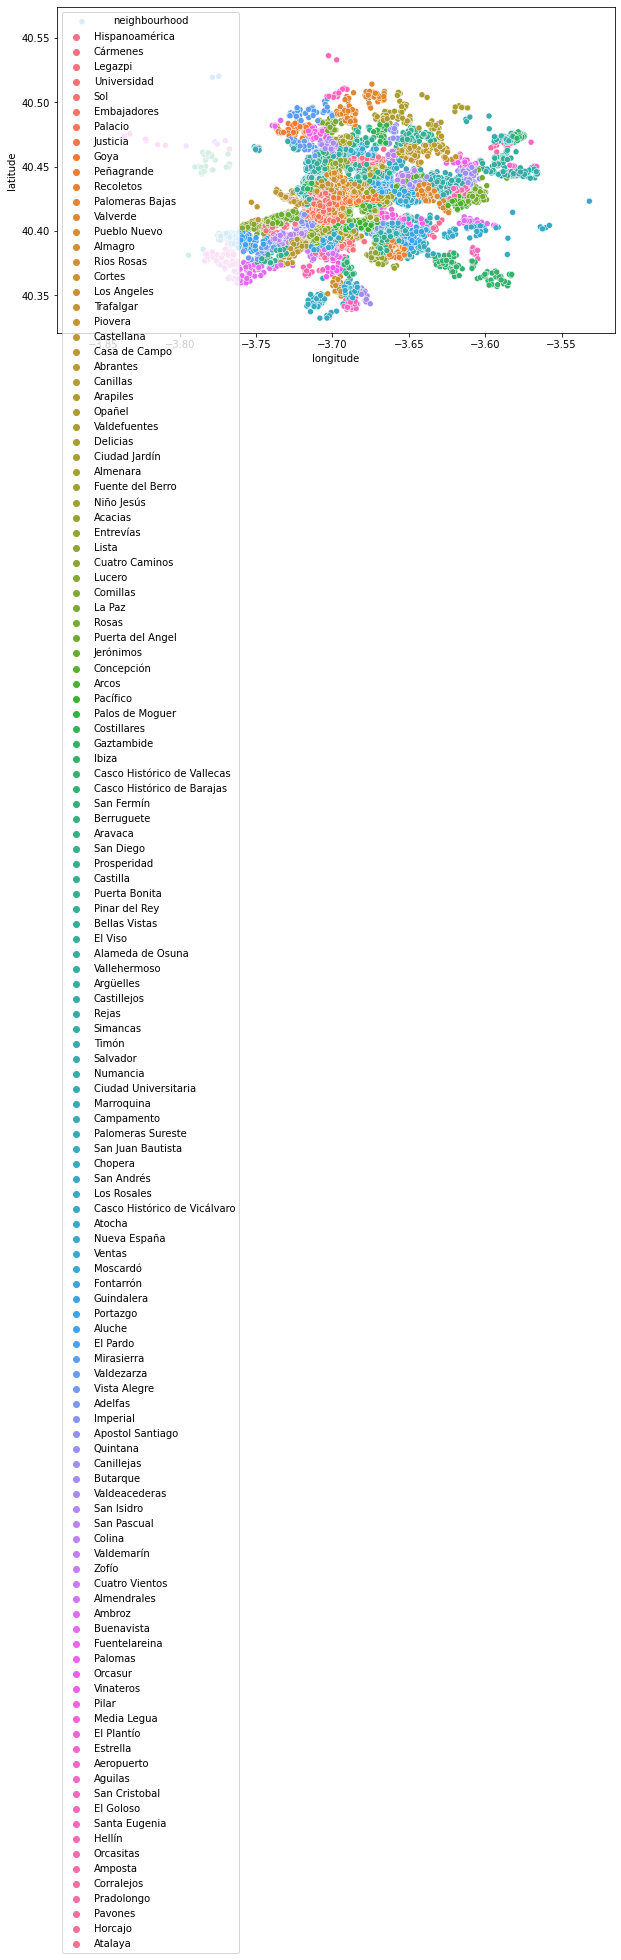

In [31]:
plt.figure(figsize=(10,6))
sns.scatterplot(airbnb.longitude,airbnb.latitude,hue=airbnb.neighbourhood)
plt.ioff()

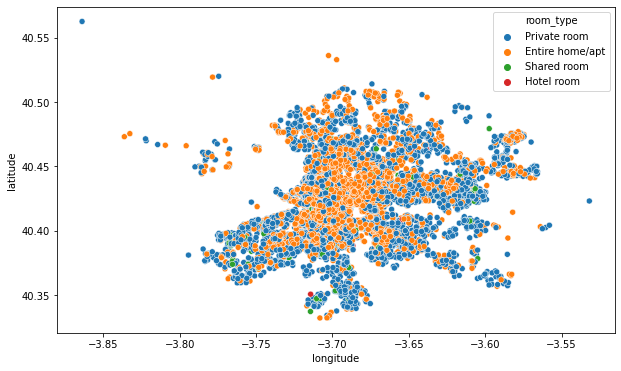

In [32]:
plt.figure(figsize=(10,6))
sns.scatterplot(airbnb.longitude,airbnb.latitude,hue=airbnb.room_type)
plt.ioff()

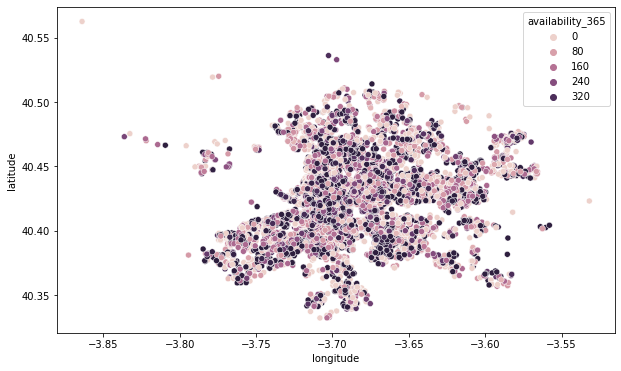

In [33]:
plt.figure(figsize=(10,6))
sns.scatterplot(airbnb.longitude,airbnb.latitude,hue=airbnb.availability_365)
plt.ioff()

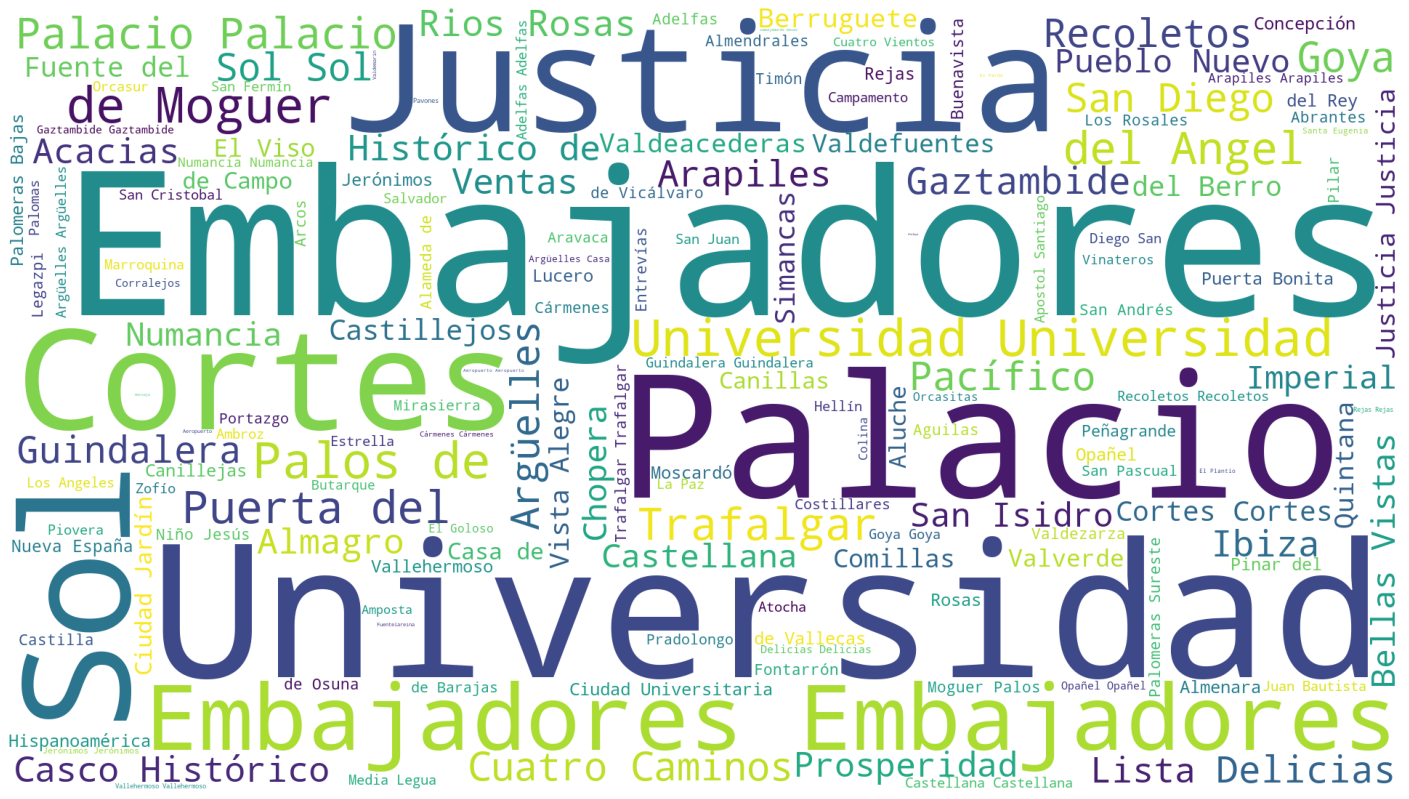

In [34]:
from wordcloud import WordCloud
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(airbnb.neighbourhood))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('neighbourhood.png')
plt.show()

In [35]:
airbnb.drop(['host_id','latitude','longitude','neighbourhood','number_of_reviews','reviews_per_month'], axis=1, inplace=True)
#examing the changes
airbnb.head(5)

,neighbourhood_group,room_type,price,minimum_nights,calculated_host_listings_count,availability_365
0,Chamartín,Private room,60,1,1,180
1,Latina,Private room,31,4,2,364
2,Arganzuela,Entire home/apt,50,15,7,1
3,Centro,Entire home/apt,92,5,1,72
4,Arganzuela,Private room,26,2,1,365


In [36]:
def Encode(airbnb):
    for column in airbnb.columns[airbnb.columns.isin(['neighbourhood_group', 'room_type'])]:
        airbnb[column] = airbnb[column].factorize()[0]
    return airbnb

airbnb_en = Encode(airbnb.copy())
airbnb_en.head(15)

,neighbourhood_group,room_type,price,minimum_nights,calculated_host_listings_count,availability_365
0,0,0,60,1,1,180
1,1,0,31,4,2,364
2,2,1,50,15,7,1
3,3,1,92,5,1,72
4,2,0,26,2,1,365
5,2,1,85,1,7,365
6,3,1,65,5,3,351
7,3,1,54,3,1,0
8,3,1,1400,3,3,365
9,3,1,79,3,11,302


Index(['neighbourhood_group', 'room_type', 'price', 'minimum_nights',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

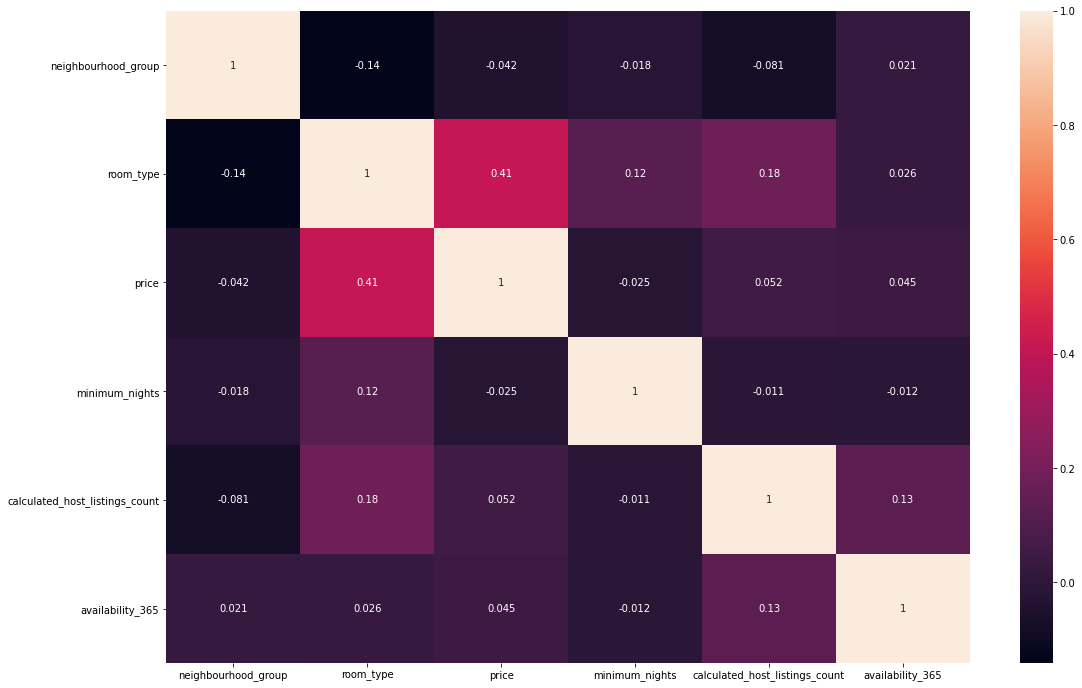

In [37]:
corr = airbnb_en.corr(method='kendall')
plt.figure(figsize=(18,12))
sns.heatmap(corr, annot=True)
airbnb_en.columns

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
#Defining the independent variables and dependent variables
x = airbnb_en.iloc[:,[0,1,3,4,5]]
y = airbnb_en['price']
#Getting Test and Training Set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=353)
x_train.head()
y_train.head()

19520    217
15786     38
9428      31
10271     66
15301    103
Name: price, dtype: int64

In [39]:
x_train.shape

(17656, 5)

In [40]:
reg=LinearRegression()
reg.fit(x_train,y_train)
y_pred=reg.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.002657046364299309

In [41]:
from sklearn.tree import DecisionTreeRegressor
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=105)
DTree=DecisionTreeRegressor(min_samples_leaf=.0001)
DTree.fit(x_train,y_train)
y_predict=DTree.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

-0.06253827285464686

In [42]:
from sklearn.tree import DecisionTreeRegressor
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=105)
DTree=DecisionTreeRegressor(min_samples_leaf=.0001)
DTree.fit(x_train,y_train)
y_predict=DTree.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

-0.029754412815898856